In [2]:
import requests
import json
import datetime
import pandas as pd

In [35]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL', 'A', 'ABNB', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EG', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FITB', 'FSLR', 'FE', 'FIS', 'FI', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

In [4]:
stocks = pd.read_csv("constituents.csv")
stocks

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [61]:
class stock:    
    #datetime format year-month-date  to convert that to a datetime, just do date.fromisoformate\
    #incriment using + datetime.timedelta(days=1)
    def __init__(self, name, price, date, industry):
        self.prices = price
        self.ticker = name
        self.industry = industry
        self.dates = date
        #print("DATE =  " + self.dates[0].date())
        """currdate = datetime.date.fromisoformat(date)
        for i in price:
            self.prices.append((currdate,float(i["c"])))
            currdate = currdate + datetime.timedelta(days=1)"""
    def graph(self):
        to_plot = []
        print(self.ticker)
        for i in self.dates:
            to_plot.append(i.timestamp() / 1000)
        df = pd.DataFrame({"prices":self.prices,"dates":to_plot})
        df.plot.line(y="prices",x="dates")
    def toJson(self): #puts all the data into a dictionary, can put that into a list and then dump that into a json file
        d = []
        for i in self.dates:
            d.append(i.isoformat())
        j = {
            "ticker": self.ticker,
            "prices": self.prices,
            "dates": d,
            "industry": self.industry
        }
        return j
    def getDateAt(self,input): #returns a tuple with (day, month, year)
        date = int(self.dates[input].strftime("%d"))
        month = int(self.dates[input].strftime("%m"))
        year = int(self.dates[input].strftime("%Y"))
        return (date, month, year)
    #misc getters and setters
    def getPrices(self):
        return self.prices
    def setPrices(self, input):
        self.prices = input
    def getTicker(self):
        return self.ticker
    def setTicker(self,input):
        self.ticker = input
    def getIndustry(self):
        return self.industry
    def setIndustry(self,input):
        self.industry = input
    def getDates(self):
        return self.dates
    def setDates(self,input):
        self.dates = input



In [39]:
def fromAPI(url): #return tuple with (ticker, prices, dates, industry)
    response = requests.get(url)
    if (response.status_code != 200):
        return 0
    parse = response.json()
    ticker = parse["ticker"]
    prices = []
    industry = stocks[stocks["Symbol"] == ticker]["GICS Sector"].iloc[0]
    dates = []
    for i in parse["results"]: #takes all the time variables from the API and converts them to datetime
        time = i["t"] / 1000
        dates.append(datetime.datetime.fromtimestamp(time))
        prices.append(i["c"])
    return (ticker,prices, dates, industry)

In [40]:
def toJSON(name, stocks):
    j = []
    for i in stocks:
        j.append(i.toJson())
    f = open(name, "w")
    f.write(json.dumps(j))
    f.close()

In [41]:
def fromJSON(input): #takes in the json file name. Returns a dictionary of stock objects that are indexed by their ticker name
    f = open(input, "r")
    ret = {}
    parse = json.loads(f.read())
    for i in parse:
        if(i != 0):
            dates = []
            for d in i["dates"]: #converts all the isoformat dates from the JSON into datetime objects
                dates.append(datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S"))
            ret[i["ticker"]] = stock(i["ticker"], i["prices"], dates,i["industry"])
    f.close()
    return ret

In [42]:
#accepts the start to the URL(before the spot with the ticker), the end of the url(after the spot with the ticker), and the start date formulated as year-month-date
#compiles all the stocks for the S&P 500 and then puts them into a JSON file
def gather(start, end): 
    #compiles all the companies
    stocks = []
    for i in tickers:
        url = start + i + end
        tmp = fromAPI(url)
        if (tmp == 0):
            print("FAILED ON:  " + i)
            stocks.append(0)
        else:
            s = stock(tmp[0],tmp[1],tmp[2],tmp[3])
            stocks.append(s.toJson)
    toJSON("stocks.json",stocks)


UNDER THIS BOX IS JUST TESTING CODE. TRY NOT TO RUN SINCE IT PINGS THE API.

200
AAPL


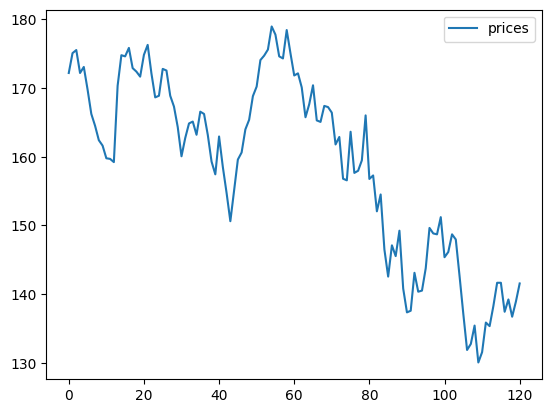

In [56]:
hold = fromAPI("https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2022-01-09/2023-01-09?adjusted=true&sort=asc&limit=121&apiKey=XsPDF2iWu6WFGmzTNYpfOCoevEOrzD4I")
apple = stock(hold[0],hold[1],"2022-01-09",hold[2])
apple.graph()

date = 
9
01/09/2022
AAPL
TSLA
AMZN


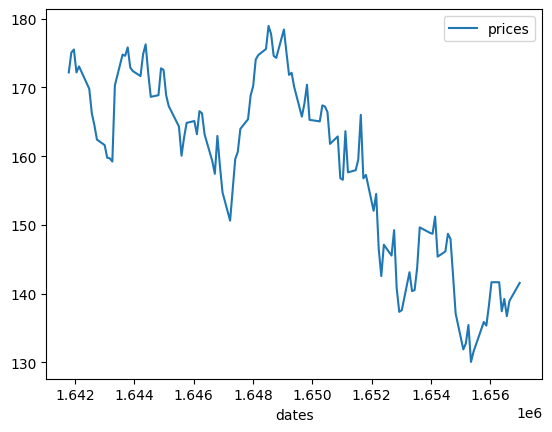

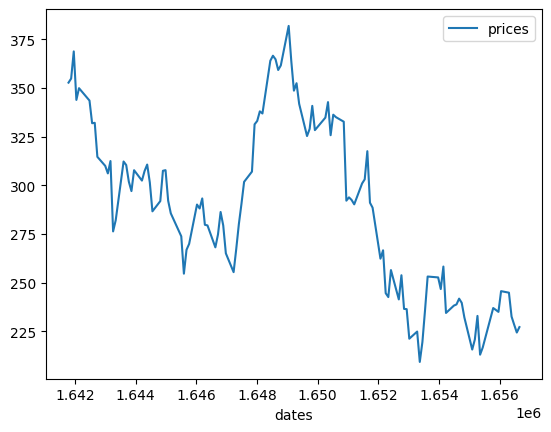

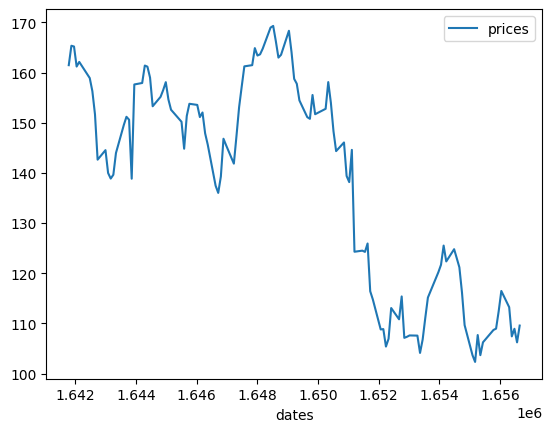

In [60]:
#loads from the API
#note: you can take the URL and replace the stock ticker to get the data from 01/09/2022 - 01/09/2023 for any company
"""hold = fromAPI("https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2022-01-09/2023-01-09?adjusted=true&sort=asc&limit=121&apiKey=XsPDF2iWu6WFGmzTNYpfOCoevEOrzD4I")
apple = stock(hold[0],hold[1],hold[2],hold[3])
hold = fromAPI("https://api.polygon.io/v2/aggs/ticker/TSLA/range/1/day/2022-01-09/2023-01-09?adjusted=true&sort=asc&limit=120&apiKey=XsPDF2iWu6WFGmzTNYpfOCoevEOrzD4I")
tesla = stock(hold[0],hold[1],hold[2],hold[3])
hold = fromAPI("https://api.polygon.io/v2/aggs/ticker/AMZN/range/1/day/2022-01-09/2023-01-09?adjusted=true&sort=asc&limit=120&apiKey=XsPDF2iWu6WFGmzTNYpfOCoevEOrzD4I")
amazon = stock(hold[0],hold[1],hold[2],hold[3])
hold = [apple,tesla,amazon]
toJSON("test.json",hold)"""
hold = fromJSON("test.json")
print(hold["AAPL"].getDateAt(0))
companies = []
for i in hold:
    hold[i].graph()


In [71]:
t = (1641186000000 + 3600000) / 1000 
dt = datetime.datetime.fromtimestamp(t).isoformat()
dt

'2022-01-03T00:00:00'